# Notes on Binary Hacking
### Source: LiveOverflow youtube
### https://www.youtube.com/channel/UClcE-kVhqyiHCcjYwcpfj9w

## Usefull VIM commands:

:w --> save file <br>
:q --> exit file <br>
:wq --> save and exit <br>
:syntax on --> syntax highlighting <br>
:set number --> show line numbers <br>
:set expandtab shiftwidth=4 softtabstop=4 --> tab gets replaced by 4 spaces <br>
:!command = execute command like when you would be in a terminal. e.g. ":!python matrix.py" <br>
<br>
vim -O matrix.c matrix.py --> opens vim with 2 horizontal sub windows to show both files a the same time <br>
ctrl + w --> switching between the two windows <br>


## 2. Writing a simple Program in C - bin 0x02
- when executing a program (e.g. compiled c file) you put a ./ in front
- when executing a terminal command the ./ is not required
- the reason is that the terminal will look at all places listed in the PATH variable which includes e.g. /usr/bin
- for executing the program without specifying the path simply add it the the path variable by "export PATH=$PATH:/home/pathtoprogram"



#### First C-program  
***matrix.c*** <br>
    #include <stdio.h>
    
    int main(int argc, char *argv[]){  
        printf("Knock, knock, Neo \n");
        return 0;
    }
<br>
argc and argv are used to parse an input to the program just like "./myprogram argument1"
argc = argument count <br>
argv = argument vector <br>
<br>
The program gets compiled via: gcc matrix.c -o matrix -Wall
"-o" defines the name of the compiled output file <br>
"-Wall" sets the flag to output all warnings <br>
"return 0" the program exits without errors <br>

#### Some small extensions to matrix.c
***matrix.c*** <br>
    #include <stdio.h>
    
    int main(int argc, char *argv[]){  
        if(argc==2){
            printf("Knock, knock, %s \n", argv[1]);
            }
        else{
            fprintf(stderr, "Usage: %s <name>\n", argv[0]);
            return 1;
        }
            return 0;
    }

<br>
the first argument of argv is the program name itself, if we give more than one additional input the error is printed and a 1 is returned to indicate an error. <br>
with "echo $?" the exit code of the last program run can be displayed


## 3. Introduction to programming in Python - bin 0x03

In contrast to C which uses a compiler to translate code into an executable binary, Python is an interpreted language. In simple terms, someone wrote a program called python in C which opens the interactive shell with all kinds of functions. If python is called with an argument e.g. python myPythonFile.py, it executes the file. <br>
***matrix.py*** <br>

    import sys
    print(sys.argv)
python matrix.py abc "cde" fgh outputs ['matrix.py', 'abc', 'cde', 'fgh']

now lets write our c-program in python3 <br>

***matrix.py*** <br>

    import sys
    
    if len(sys.argv) == 2:
        print("Knock, knock, {0}".format(sys.argv[1]))
    else:
        sys.stderr.write("Usage: {0} <name>\n".format(sys.argv[0]))

Executing the program requires "python matrix.py", to get rid of the python command, a shebang command can be used. <br>
***matrix.py*** <br>
    
    #!/usr/bin/python3
    import sys
    
    if len(sys.argv) == 2:
        print("Knock, knock, {0}".format(sys.argv[1]))
    else:
        sys.stderr.write("Usage: {0} <name>\n".format(sys.argv[0]))
        
Additionally the file has to get the executable flag such that it is not interpreted as a regular text file which is done by chmod +x matrix.py


## 4. How a CPU works and Introduction to Assembler - bin 0x04


- assembly has 8 - 32 global variables of fixed size called registers
- fixed size means that on a 32 bit machine those registers have 32 bits.
- There are special registers. The most important is the "Program Counter" also called instruction pointer, RIP or EIP which tells the CPU which instruction is executed next
- Every time an instruction is executed the program counter is incremented
- virtually all computation is expressed in terms of simple operations on registers
- what doesn't fit in registers lives in memory
- memory is accessed by loading and storing at addresses or push and pop operations on a stack
- control flow is done via GOTOs, jumps, branches or calls. Those calls are altering the program counter directly
- The CPU has the fastest access to registers, followed by the cache and the slowest memory is the RAM.
- some functions additionally to manipulating a register will also set flags e.g. the zeroflag if a result was zero
<br>
#### Assembly example for hello world
<pre>
   0x0000000000400526   <+0>:	 push   %rbp 
   0x0000000000400527   <+1>:	 mov    %rsp,%rbp 
   0x000000000040052a   <+4>:	 mov    \$0x4005c4,%edi
   0x000000000040052f   <+9>:	 mov    \$0x0,%eax
   0x0000000000400534   <+14>:	callq  \$0x400400 <printf@plt> 
   0x0000000000400539   <+19>:	mov    \$0x0,%eax 
   0x000000000040053e   <+24>:	pop    %rbp 
   0x000000000040053f   <+25>:	retq 

The memory address is displayed at the left side, followed by the command and its arguments <br>
practice at microcurruption.com


## 05. Reversing and Cracking first simple Program - bin 0x05

***crackme.c***
    #include <string.h>
    #include <stdio.h>

    int main(int argc, char *argv[]){
        if(argc==2){
            printf("Checking the LicenseKey: %s\n", argv[1]);
            if(strcmp(argv[1], "licence-key-1337")==0){
                printf("Well done");
            }
            else{
                printf("Zonk!!! \n");
            }  
        }
        else{
            printf("Usage: <key> \n");
        }

    }

***Compiling the program*** <br>

    gcc -o crackme crackme.c

***Testing the program*** <br>

    ./crackme
    Usage: <key>

    ./crackme alsjdf
    Checking the LicenseKey: alsjdf
    Zonk!!! 

***disassembling the program*** <br>

    gdb crackme
    (gdb) set disassembly-flavor intel
    (gdb) disassemble main
   
<pre>
   0x00000000004005b6 <+0>:	 push   rbp
   0x00000000004005b7 <+1>:	 mov    rbp,rsp
   0x00000000004005ba <+4>:	 sub    rsp,0x10
   0x00000000004005be <+8>:	 mov    DWORD PTR [rbp-0x4],edi
   0x00000000004005c1 <+11>:	mov    QWORD PTR [rbp-0x10],rsi
   0x00000000004005c5 <+15>:	cmp    DWORD PTR [rbp-0x4],0x2
   0x00000000004005c9 <+19>:	jne    0x400621 <main+107>
   0x00000000004005cb <+21>:	mov    rax,QWORD PTR [rbp-0x10]
   0x00000000004005cf <+25>:	add    rax,0x8
   0x00000000004005d3 <+29>:	mov    rax,QWORD PTR [rax]
   0x00000000004005d6 <+32>:	mov    rsi,rax
   0x00000000004005d9 <+35>:	mov    edi,0x4006c4
   0x00000000004005de <+40>:	mov    eax,0x0
   0x00000000004005e3 <+45>:	call   0x400480 <printf@plt>
   0x00000000004005e8 <+50>:	mov    rax,QWORD PTR [rbp-0x10]
   0x00000000004005ec <+54>:	add    rax,0x8
   0x00000000004005f0 <+58>:	mov    rax,QWORD PTR [rax]
   0x00000000004005f3 <+61>:	mov    esi,0x4006e1
   0x00000000004005f8 <+66>:	mov    rdi,rax
   0x00000000004005fb <+69>:	call   0x4004a0 <strcmp@plt>
   0x0000000000400600 <+74>:	test   eax,eax
   0x0000000000400602 <+76>:	jne    0x400615 <main+95>
   0x0000000000400604 <+78>:	mov    edi,0x4006f2
   0x0000000000400609 <+83>:	mov    eax,0x0
   0x000000000040060e <+88>:	call   0x400480 <printf@plt>
   0x0000000000400613 <+93>:	jmp    0x40062b <main+117>
   0x0000000000400615 <+95>:	mov    edi,0x4006fc
   0x000000000040061a <+100>:   call   0x400470 <puts@plt>
   0x000000000040061f <+105>:   jmp    0x40062b <main+117>
   0x0000000000400621 <+107>:   mov    edi,0x400705
   0x0000000000400626 <+112>:   call   0x400470 <puts@plt>
   0x000000000040062b <+117>:   mov    eax,0x0
   0x0000000000400630 <+122>:   leave  
   0x0000000000400631 <+123>:   ret
    

First try to get an overview of the control flow.
<pre>
 <+15>:	cmp 0x2
 <+19>:	jne <main+107>

 <+45>:	call printf
 <+69>:	call strcmp
 <+74>:	test
 <+76>:	jne <main+95>

 <+88>:	call printf
 <+93>:	jmp

 <+100>:  call puts
 <+105>:  jmp 

 <+112>:  call puts
 <+117>: exit program

At the start (main+15) we got a compare with the number 2 followed by a "jne"/jump not equal.
Depending on the result we jump to 400621/<main+107> which puts something in edi, calls "puts" which is just a print command and exits
<pre>
    <+15>:	cmp 0x2
|-- <+19>:	jne main+107
|  
|   <+45>:	call printf
|   <+69>:	call strcmp
|   <+74>:	test
|   <+76>:	jne main+95
|
|   <+88>:	call printf
|   <+93>:	jmp
|
|   <+100>:  call puts
|   <+105>:  jmp 
|
|--> <+112>:  call puts
     <+117>: exit program

If the compare gets a 2 we get a printf at main+45, followed by a strcmp at main+69.
Depending on the result of strcmp we got a "jne" again at line main+76 which either jumps to main+95 (another puts/print) or proceeds to main+88

<pre>
    <+15>:	cmp 0x2
|-- <+19>:	jne main+107
|   |
|   <+45>:	call printf
|   <+69>:	call strcmp
|   <+74>:	test
||--<+76>:	jne main+95
||  |
||  <+88>:	call printf
||  <+93>:	jmp main+117 / exit
||
||-><+100>:  call puts
|   <+105>:  jmp main+117 / exit
|
|--> <+112>:  call puts
     <+117>: exit program


<pre>
(gdb) break *main --> sets a breakpoint right at the start
(gdb) run
(gdb) info registers --> shows the value of all registers including the position of the instruction 
pointer
(gdb) si --> steps one instruction / instruction pointer as a different value now
(gdb) ni --> step one instruction in main / not just one instruction in a called function
repeating ni results in "Usage: < key >" which is understandable since we did not provide an input and the compare with 2 is "not equal".

lets retry with: 
(gdb) run licence-key-1447

repeat (gdb) ni
output: Checking the LicenseKey: licence-key-1447

repeat (gdb) ni
0x0000000000400602 <+76>
(gdb) ni
0x0000000000400615 <+95>
so we jumped over lines <+88> and <+93>

set a breakpoint right before this comparison and jump
(gdb) break *0x0000000000400600
(gdb) run licence-key-1447
(gdb) continue --> runs until our second breakpoint

Now we are at: 0x0000000000400600 <+74>:	test   eax,eax
eax (first 32 bit of rax) is not 0 which was the result of the string comparison.
(gdb) set $eax=0 --> sets this comparison flag to zero
repeat (gdb) ni --> "well done"

Exercises can be found on Crackmes.de

## 06.  Simple Tools and Techniques for Reversing a binary - bin 0x06

- hexdump -C crackme --> prints the hex code of the file. This even includes the string of the license key
- strings crackme --> prints all the strings which can be read
- objdump --> outputs far more information about a file

- linux provides various functions so called syscalls e.g. write which writes output on the console.
- - Used functions can be checked with strace and ltrace.
- - ltrace gives us an output: strcmp("alsdjflsd", "licence-key-1337") which includes the key!
- affortable decompiler and some reverse engineering tools are provided by Hopper. A freeware alternative is radare2

## 07. Uncrackable Programs? Key validation with Algorithm and creating a Keygen - bin 0x07

Since we can read strings like License Keys out of the binary lets try to use the cross sum of the asci values of the key letters.

***crackme_v2.c***
    #include <string.h>
    #include <stdio.h>

    int main(int argc, char *argv[]){
        if(argc==2){
            printf("Checking the LicenseKey: %s\n", argv[1]);
            int sum = 0;
            for(int i=0; i < strlen(argv[1]); i++){
                sum += (int)argv[1][i];
            }
            
            if(sum == 1348){
                printf("Well done \n");
            }
            else{
                printf("Zonk!!! \n");
            }  
        }
        else{
            printf("Usage: <key> \n");
        }

    }

gcc -o crackme_v2 crackme_v2.c <br>
radare2 crackme_v2 <br>

***radare commands***

    aaa = aa --> analyze all (e.g. it figures out where the main function is)
    s main --> seeks the main function (can also be used to seek a memory address)
    "Esc"-button --> go one step back
    pdf --> show disassembly
    v --> enter visual mode
    VV --> show flow graph of the program
    ood abcdefg --> open program in debug mode with function argument abcdefg
    dc --> execute the program
    db 0x00400656 --> set breakpoint at 0x00400656
    ds --> step one instruction
    quit --> leave radare2
    dr --> display registers
    dr rip=0x00400658 --> sets rip to 0x00400658
    afvn local_2_4 i --> renames local_2_4 variable to i

***Way to bypass the input:***

    radare2 crackme_v2
    aaa
    s sym.main
    pdf
    look for the decision where the jump into the wrong or right is executed. (0x00400656)
    ood alsdjflsjdf
    dc
    db 0x00400656
    ood lfjsldfjsf
    dc
    dr
    dr rip=0x00400658 --> set the instruction pointer on the print statement "printf("Well done \n");"
    dc
    


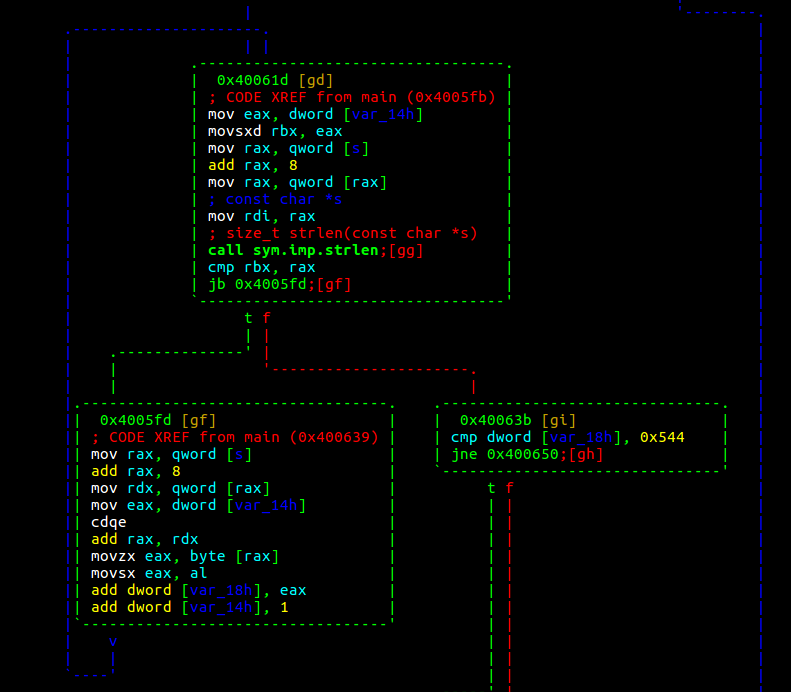

In [21]:
from IPython.display import Image
Image("imgs/radare_for_loop.png", retina=True)

***The image above shows a for loop in radare***

in the bottom left "add dword [var_14h], 1" adds a 1 to our counter (i++) with var_14h being our "i"

the "cmp rbx, rax" in the top block is our condition which either loops (going left) or leaves depending on the strlen call above, rbx and rax. 

After understanding that the left block iterates over the input and sums up the ASCI values of the string, followed by a comparison of this sum with 0x544 we can create a keygen.

In [ ]:
def check_key(key, printFlag):
    char_sum = 0
    for c in key:
        char_sum += ord(c)
        
    if printFlag:
        print(key, char_sum)
    return char_sum

check_key('AAA', 1)
check_key('AAB', 1)
check_key('BAA', 1)

import random

def keygen(num_keys):
    i = 1
    key = ""
    while True:
        key += random.choice('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890-_')
        s = check_key(key, 0)
        if s > int(0x544):
            key = ""
        elif s == int(0x544):
            print(key)
            i += 1
        
        if(i>num_keys):
            break

keygen(5)

In [ ]:
import subprocess
print(subprocess.check_output(["./crackme_v2", "L1TU9-O5yxpLfpeL"]))


### 08. Uncrackable Program? Finding a Parser Differential in loading ELF - bin 0x08

since gdb or radare execute the binary which contains more than just the source code, it might be possibly to change part of the executable such that linux can still execute it but gdb and radare throw and error due to a perser differential.

In [ ]:
import random
import os
def flip_byte(in_bytes):
    i = random.randint(0, len(in_bytes))
    c = str(random.randint(0,255))
    return in_bytes[:i] + c + in_bytes[i+1:]

print(flip_byte('AAAAAAAAAAA'))
print(flip_byte('AAAAAAAAAAA'))
print(flip_byte('AAAAAAAAAAA'))
print(flip_byte('AAAAAAAAAAA'))
print(flip_byte('AAAAAAAAAAA'))


In [ ]:
os.system("cp crackme_v2 crackme_v2_fuzz")

In [ ]:
import random
import os

def flip_byte(in_bytes):
    i = random.randint(0, len(in_bytes))
    # in python3 there is no implicit type conversion between str and bytes str() has to be replaced with bytes()
    c = bytes(random.randint(0,255))
    return in_bytes[:i] + c + in_bytes[i+1:]

os.system("cp crackme_v2 crackme_v2_fuzz")
def copy_binary():
    os.system("cp crackme_v2 crackme_v2_fuzz")
    with open('crackme_v2', 'rb') as orig_f, open('crackme_v2_fuzz', 'wb') as new_f:
        new_f.write( flip_byte(orig_f.read()) )

def compare(fn1, fn2):
    with open(fn1) as f1, open(fn2) as f2:
        return f1.read() == f2.read()

os.system("(./crackme_v2_fuzz ; ./crackme_v2_fuzz L1TU9-O5yxpLfpeL) > orig_output")
def check_output():
    os.system("(./crackme_v2_fuzz ; ./crackme_v2_fuzz L1TU9-O5yxpLfpeL) > fuzz_output")
    return compare("orig_output", "fuzz_output")

os.system("echo disassemble main | gdb crackme_v2_fuzz > orig_gdb")
def check_gdb():
    os.system("echo disassemble main | gdb crackme_v2_fuzz > fuzz_gdb")
    return compare("orig_gdb", "fuzz_gdb")


os.system('echo -e "aaa\ns sym.main\npdf" | radare2 crackme_v2_fuzz > orig_radare')
def check_radare2():
    os.system("echo -e 'aaa\n s sym.main \n pdf'"" | radare2 crackme_v2_fuzz > fuzz_radare ")
    return compare("orig_radare", "fuzz_radare")


while True:
    copy_binary()
    if check_output() and not check_gdb() and not check_radare2():

        print("Found possible binary")
        os.system("tail fuzz_gdb")
        os.system("tail fuzz_radare")
                  

### 09. Syscalls, Kernel vs. user Mode and linux Kernel Source Code - bin 0x09

The system call is the fundamental interface between an application and the Linux kernel

***write_test.c***

    void main(){
        write(1, "HACK\n", 5);
    }
   
   
    gcc -o write_test write_test.c
    radare2 -d ./write_test
    aaa
    s sym.main
    pdf
    look for the memory address of "call sym.imp.write"
    e.g. 0x0040053e      e8bdfeffff     call sym.imp.write
    db 0x0040053e
    dc
    V!
    with s you can step through the write function
    
- in the end a 1 is written into eax and a syscall is executed
- Depending on which number is written into eax the processor jumps to a different memory location. On the different memory locations different functions are located. 
- A Linux Syscall table shows which eax number corresponds to which function. e.g. 1=write
- A syscall is a level 0 privilege level procedure (Kernel level). In user mode you can not directly access level 0 but instead have to go through something like a syscall.
- those syscalls often invoke pointers to some arguments like a string which has to be printed, the memory locations of those pointers for different programs often are in the same memory space. This happens because the memory locations are not the physical one on the RAM but instead virtual memory which is managed by the memory management unit (MMU) and distributed by the MMU to to RAM such that the programmer does not have to care about which memory is in use or not. 

### 0A. The deal with numbers: hexadecimal, binary and decimals - bin 0x0A

- since our CPUs are clusters of transistors which can be on or off, 0/1 are the obvious choice for digits in the machine language 0/1 = bit
- IBMs System 360 is the historical reason for 8 bits instead of any other number being 1 byte = 1 Oktett
- 4 bits are 1 nibble and 1 nibble can be represented by 1 hex digit

In [8]:
print(int('1111', 2)) # what is 1111 with a base of 2 in decimal
print(int('11111111', 2))

for i in ['00000000', '00000010', '01010101', '11110010', '11111111']:
    print("{0} | {1:3} | {2:2x}".format(i, int(i,2), int(i,2)))

15
255
00000000 |   0 |  0
00000010 |   2 |  2
01010101 |  85 | 55
11110010 | 242 | f2
11111111 | 255 | ff


In [10]:
print( bin(123) )
print( hex(123) )
print( int('0b1111011', 2) )

0b1111011
0x7b
123


In [20]:
import struct
print( struct.unpack("I", bytes("ABCD", 'utf-8')) ) # I=integer
print( hex(struct.unpack("I", bytes("ABCD", 'utf-8'))[0]) )
print( struct.pack("I", 0x3456245) ) # 41 = 'A' is at the end because of little endian

(1145258561,)
0x44434241
b'EbE\x03'


***Negative numbers***

    0000 = 0
    0001 = 1
    0010 = 2
    0011 = 3
    0100 = 4
    0101 = 5
    0110 = 6
    0111 = 7
    1000 = -8
    1001 = -7
    1010 = -6
    1011 = -5
    1100 = -4
    1101 = -3
    1110 = -2
    1111 = -1

- Two's complement, invert the bits and add 1
- 0011 = 3
- inverting --> 1100
- add 1 --> 1101 = -3

    bit = 0/1
    nibble = 1010 = 4 bits
    byte = 1010 0000 = 2 nibbles = 2 hex numbers 0xA0
    a word on 32 bit = 32 bits = 8 hex numbers
    a word on 64 bit machines = 64 bits = double word on 32 bit = 16 hex numbers = 8 bytes

### 0B. Smashing the Stack for Fun and Profit- setuid, ssh and exploit.education - bin 0x0B

http://phrack.org/issues/49/14.html
https://exploit-exercises.injecti0n.org/